In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# load your data
historical_data = pd.read_csv('data_up_to_2000.csv')
historical_data_did_results = pd.read_csv('did_results.csv')
predictions_data = pd.read_csv('predictions_output.csv')

# merge the historical data with the DiD results
full_historical_data = pd.merge(historical_data, historical_data_did_results, on='policy_id', how='left')

# combine for a continuous timeline
full_data = pd.concat([full_historical_data, predictions_data])

# FILTER for a specific location
state_data = full_data[full_data['location'] == 'Federal']

# sort by year to ensure correct order of operations
state_data.sort_values('year', inplace=True)

# fill NaN values for years without predictions
state_data['predicted_DiD_rate_for_women'].fillna(0, inplace=True)

# calculate adjusted rates post-2000
last_known_rate = state_data.loc[state_data['year'] <= 2000, 'rate_for_women'].iloc[-1]

# initialize the adjusted rates with the actual rate for 2000
adjusted_rates = [last_known_rate]

# loop through the DataFrame and apply the DiD impact year-over-year
for i in range(1, len(state_data)):
    year = state_data.iloc[i]['year']
    if year > 2000:
        # add the predicted DiD impact to the previous year's adjusted rate
        adjusted_rate = adjusted_rates[-1] + state_data.iloc[i]['predicted_DiD_rate_for_women']
        adjusted_rates.append(adjusted_rate)
    else:
        # for years up to and including 2000, just append the actual rate
        adjusted_rates.append(state_data.iloc[i]['rate_for_women'])

# add the list of adjusted rates back to the DataFrame
state_data['rate_for_women_adjusted'] = adjusted_rates


non_zero_did = state_data['predicted_DiD_rate_for_women'] != 0


<ipython-input-5-140e12b1f5f2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data.sort_values('year', inplace=True)
<ipython-input-5-140e12b1f5f2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['predicted_DiD_rate_for_women'].fillna(0, inplace=True)
<ipython-input-5-140e12b1f5f2>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['rate_for_women_

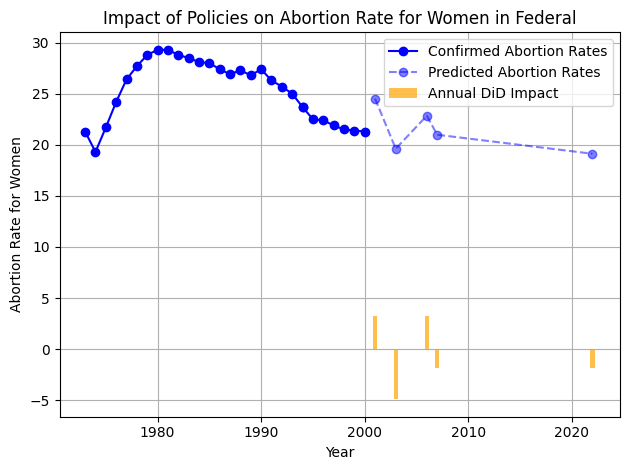

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
# separate the historical and predicted data for plotting
historical_state_data = state_data[state_data['year'] <= 2000]
predicted_state_data = state_data[state_data['year'] > 2000]

# plotting the actual rates up to the year 2000
plt.plot(historical_state_data['year'], historical_state_data['rate_for_women_adjusted'], label='Confirmed Abortion Rates', marker='o', color='blue', linestyle='-')

# plotting the predicted rates post-2000 with a different style
plt.plot(predicted_state_data['year'], predicted_state_data['rate_for_women_adjusted'], label='Predicted Abortion Rates', marker='o', color='blue', linestyle='--', alpha=0.5)

# plot the DiD impacts as bars for the years where policy changes occurred
plt.bar(state_data[non_zero_did]['year'], state_data[non_zero_did]['predicted_DiD_rate_for_women'], width=0.4, alpha=0.7, label='Annual DiD Impact', color='orange')

# set labels, title, legend, and grid for the plot
plt.xlabel('Year')
plt.ylabel('Abortion Rate for Women')
plt.title('Impact of Policies on Abortion Rate for Women in Federal')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
